In [25]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 28 00:07:49 2022

@author: mdsou
"""
import plotly.figure_factory as ff
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# for basic mathematics operation
import numpy as np
from pandas import plotting

# for interactive visualizations
import plotly.offline as py

warnings.filterwarnings('ignore')

#Load and read data
df=pd.read_csv('C:\\Users\\mdsou\\Downloads\\HousePrices.csv')

pd.set_option('display.max_columns', None)
#Describe basic data attributes

In [21]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [22]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,26868.770371,211.572431,0.725951,0.514492,1.069324
min,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [23]:
df.isnull().any()

Price           False
SqFt            False
Bedrooms        False
Bathrooms       False
Offers          False
Brick           False
Neighborhood    False
dtype: bool

In [24]:
df.corr()

,Price,SqFt,Bedrooms,Bathrooms,Offers
Price,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.313636,0.336923,0.114271,0.143793,1.000000


<AxesSubplot:>

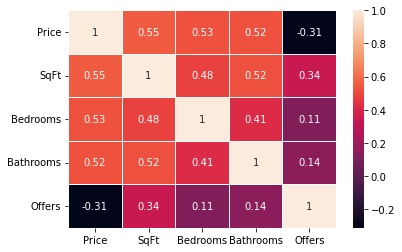

In [6]:
sns.heatmap(df.corr(),annot=True,lw=1)

In [8]:
df['Bathrooms'].value_counts()

2    72
3    55
4     1
Name: Bathrooms, dtype: int64

In [9]:
df['Bedrooms'].value_counts()

3    67
2    30
4    29
5     2
Name: Bedrooms, dtype: int64

In [10]:
df['Offers'].value_counts()

3    46
2    36
1    23
4    19
5     3
6     1
Name: Offers, dtype: int64

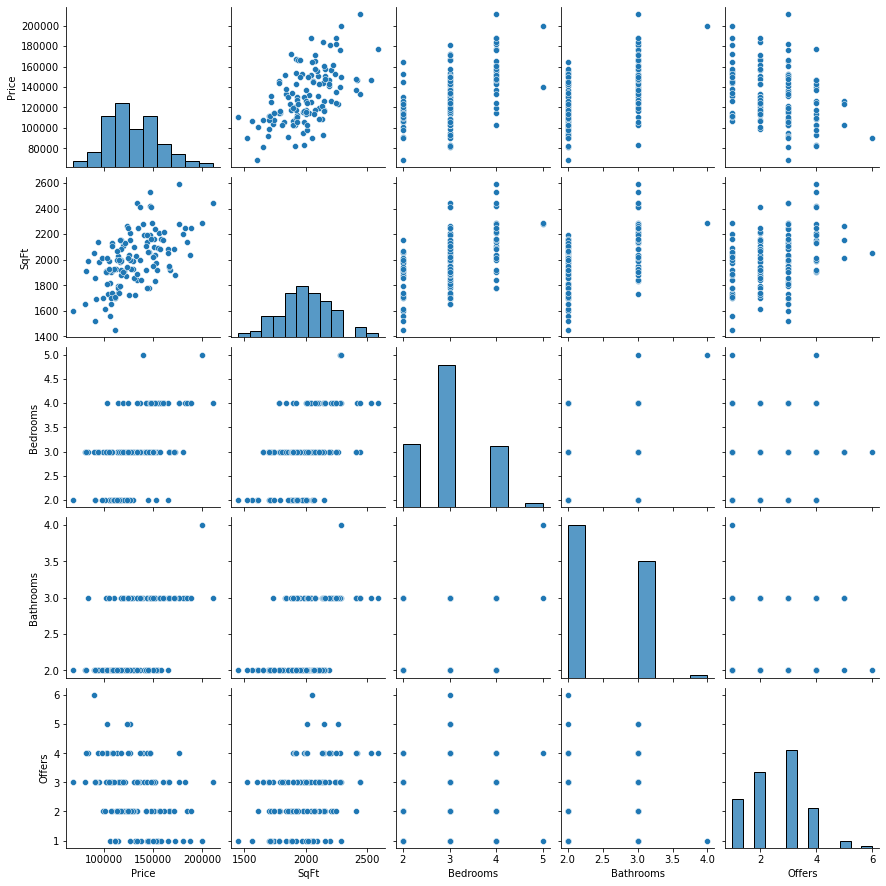

In [12]:
#Vizualize some of the variables
sns.pairplot(df)

#Show distributions

<AxesSubplot:xlabel='Price', ylabel='Count'>

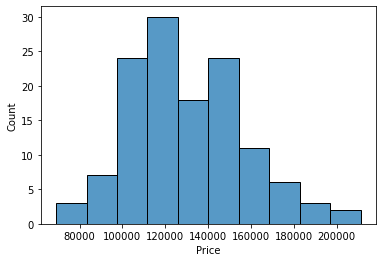

In [13]:
sns.histplot(df['Price'])

<AxesSubplot:xlabel='SqFt', ylabel='Count'>

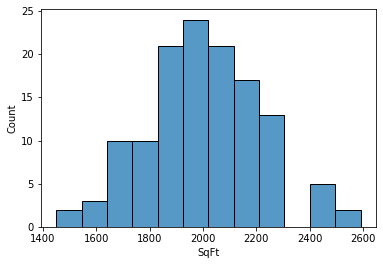

In [14]:
sns.histplot(df['SqFt'])

<AxesSubplot:xlabel='Bedrooms', ylabel='Count'>

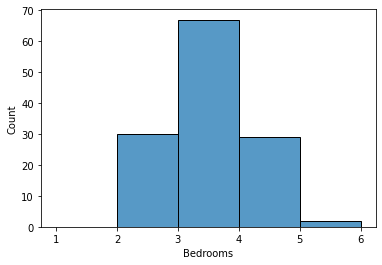

In [15]:
sns.histplot(df['Bedrooms'], bins=(1,2,3,4,5,6))

<AxesSubplot:xlabel='Bathrooms', ylabel='Count'>

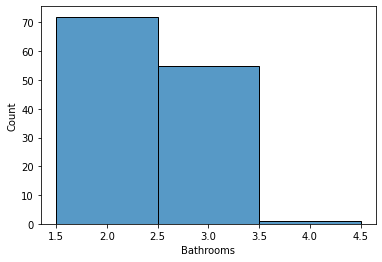

In [16]:
sns.histplot(df['Bathrooms'], discrete=True)

<AxesSubplot:xlabel='Offers', ylabel='Count'>

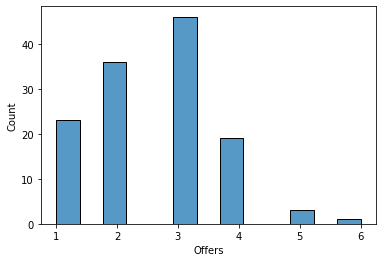

In [17]:
sns.histplot(df['Offers'])

In [18]:
df.value_counts()

Price   SqFt  Bedrooms  Bathrooms  Offers  Brick  Neighborhood
69100   1600  2         2          3       No     North           1
81300   1650  3         2          3       No     North           1
147700  2410  3         3          2       No     East            1
147100  2190  3         3          4       Yes    East            1
147000  2420  4         3          4       No     West            1
                                                                 ..
114200  2030  4         2          3       No     East            1
113800  2000  3         2          4       No     North           1
113500  2070  2         2          2       No     North           1
112300  1930  2         2          2       Yes    North           1
211200  2440  4         3          3       Yes    West            1
Length: 128, dtype: int64

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


train_set, test_set = train_test_split(df, test_size=0.3)

In [29]:
train_y = train_set[['Price']]
test_y = test_set[['Price']]

In [30]:
#Separate target variable
train_y
train_x = train_set.drop(['Price'], axis=1)
test_y = test_set.drop(['Price'], axis=1)

In [31]:
train_x = train_set.drop(['Price'], axis=1)
test_y = test_set.drop(['Price'], axis=1)
train_x

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
108,1990,3,3,3,Yes,East
74,2140,3,3,3,No,West
41,1840,4,3,2,No,West
1,2030,4,2,3,No,East
32,2250,3,3,3,Yes,East
...,...,...,...,...,...,...
75,1900,2,2,2,No,North
22,1690,3,2,3,No,North
70,1950,3,3,3,Yes,West
33,2280,5,3,4,Yes,East


In [33]:
train_x = train_set.drop(['Price'], axis=1)
test_y = test_set.drop(['Price'], axis=1)


In [35]:
#Identify the numerical columns
train_x.dtypes
#numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [36]:
# Identify the categorical columns
categorical_columns = train_x.select_dtypes('object').columns.to_list()
#binary_columns = df['Brick']
categorical_columns
#binary_columns = ['Brick'].astype('boolean')
df['Brick']
df2 = pd.get_dummies(data = df,
               columns = categorical_columns,
              dtype='int8')
df2

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,1,0,1,0,0
1,114200,2030,4,2,3,1,0,1,0,0
2,114800,1740,3,2,1,1,0,1,0,0
3,94700,1980,3,2,3,1,0,1,0,0
4,119800,2130,3,3,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,0,1,1,0,0
124,147900,2160,4,3,3,0,1,1,0,0
125,113500,2070,2,2,2,1,0,0,1,0
126,149900,2020,3,3,1,1,0,0,0,1


In [38]:
#Create new set based on modified categorical columns
train_set, test_set = train_test_split(df2, test_size=0.3)

train_y = train_set[['Price']]
test_y = test_set[['Price']]
#Separate target variable

In [39]:
train_x = train_set.drop(['Price'], axis=1)
test_x = test_set.drop(['Price'], axis=1)

In [40]:
#Check data set 
test_x.head(10)

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
48,1980,2,2,2,1,0,1,0,0
4,2130,3,3,3,1,0,1,0,0
81,2140,4,3,2,0,1,0,0,1
62,2220,4,3,2,1,0,0,0,1
23,1820,3,2,3,0,1,0,1,0
44,1940,3,3,2,0,1,0,0,1
94,2150,4,3,3,0,1,0,0,1
55,1720,2,2,2,0,1,1,0,0
2,1740,3,2,1,1,0,1,0,0
80,2190,3,3,4,0,1,1,0,0


In [ ]:
#Optional pipeline for transforming variables. Improves model predictions greatly but at the cost of easy interpretation.
#Ensure to properly explore data to determine changes
#for col in binary_columns:
#    categorical_columns.remove(col)

# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

binary = train_inputs.select_dtypes('boolean').columns.to_list()
#Alternate method to identify binary columns and remove from inclusion in other lists. 
binary_columns = []
for column in numerical_columns:
    if len(pd.unique(df[column])) <= 2:
        binary_columns.append(column)
        numerical_columns.remove(column)
#Check the contents of each column
binary_columns
numeric_columns
categorical_columns
#Creating my pipeline
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='passthrough')
train_x = preprocessor.fit_transform(train_inputs)
test_x = preprocessor.transform(test_inputs)


In [43]:
#Convert back to dataframes
x = pd.DataFrame(train_x)
y = pd.DataFrame(train_y)

In [44]:
#Evalute the model and print statistics
import statsmodels.api as sm

regr = LinearRegression()
model = regr.fit(train_y, train_x)

from statsmodels.api import OLS
OLS(train_y, train_x).fit().summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     69.29
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.53e-31
Time:                        14:49:43   Log-Likelihood:                -948.24
No. Observations:                  89   AIC:                             1912.
Df Residuals:                      81   BIC:                             1932.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
SqFt                  52.1603      7.521      6.935      0.000      37.196      67.125
Bedrooms            5861.4653   2122.431      2.762      0.007    1638.494    1.01e+04
Bathrooms           7489.4754   2593.059      2.888      0.005    2330.101    1.26e+04
Offers             -8126.4997   1428.158     -5.690      0.000    -1.1e+04   -5284.914
Brick_No             559.1802   7431.827      0.075      0.940   -1.42e+04    1.53e+04
Brick_Yes           1.755e+04   7748.243      2.265      0.026    2135.122     3.3e+04
Neighborhood_East  -1015.5705   5189.021     -0.196      0.845   -1.13e+04    9308.954
Neighborhood_North   112.9977   4503.439      0.025      0.980   -8847.433    9073.428
Neighborhood_West   1.901e+04   6400.939      2.970      0.004    6277.588    3.17e+04
==============================================================================
Omnibus:                        1.081   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.560
Skew:                           0.095   Prob(JB):                        0.756
Kurtosis:                       3.339   Cond. No.                     2.32e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.66e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Calculate our target value
mean_value = np.mean(train_y['Price'])
mean_value

from sklearn.metrics import mean_squared_error
baseline_pred = np.repeat(mean_value, len(test_y))
baseline_pred
baseline_mse = mean_squared_error(test_y, baseline_pred)

baseline_rmse = np.sqrt(baseline_mse)
#This will be our baseline to evaluate our model against
print('Baseline RMSE: {}' .format(baseline_rmse))
print(regr.coef_)
print(regr.intercept_)
print(regr.score(train_x, train_y))

In [ ]:
#Create predictions
y_pred = regr.predict(test_x)

r_sq = regr.score(test_x, test_y)

cdf = pd.DataFrame(regr.coef_,test_x.columns,columns=['Coeff'])
cdf
print('coefficient of determination:', r_sq)
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)

In [ ]:
#Support Vector Machine with Linear SVR
from sklearn.svm import LinearSVR 

svm_reg = LinearSVR(C=100, epsilon=0.5, max_iter=10000) 

svm_reg.fit(train_x, train_y)

In [ ]:
#Train RMSE
svm_train_pred = svm_reg.predict(train_x)

train_mse = mean_squared_error(train_y, svm_train_pred)

train_rmse = np.sqrt(train_mse)

print(f'Train RMSE: {train_rmse}')

In [ ]:
#Test RMSE
svm_test_pred = svm_reg.predict(test_x)

test_mse = mean_squared_error(test_y, svm_test_pred)

test_rmse = np.sqrt(test_mse)

print(f'Test RMSE: {test_rmse}')

In [ ]:
#SVR with 'RBF' Kernal

In [ ]:
#Tends to have the best performance for SVR kernals
from sklearn.svm import SVR 

svm_rbf_reg = SVR(kernel="rbf", C=100, epsilon=0.01, gamma='scale') 

svm_rbf_reg.fit(train_x, train_y)

In [ ]:
#Train RMSE
svm_train_pred = svm_rbf_reg.predict(train_x)

train_mse = mean_squared_error(train_y, svm_train_pred)

train_rmse = np.sqrt(train_mse)

print(f'Train RMSE: {train_rmse}')

In [ ]:
svm_test_pred = svm_rbf_reg.predict(test_x)

test_mse = mean_squared_error(test_y, svm_test_pred)

test_rmse = np.sqrt(test_mse)

print(f'Test RMSE: {test_rmse}')